In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("HospInfo.csv")
df.head(20)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"
5,11304,CHOCTAW GENERAL HOSPITAL,"401 VANITY FAIR LANE, PO BOX 618",BUTLER,AL,36904,CHOCTAW,2054599100,Critical Access Hospitals,Voluntary non-profit - Private,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"401 VANITY FAIR LANE, PO BOX 618\nBUTLER, AL\n"
6,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,PO BOX 287,BETHEL,AK,99559,BETHEL,9075436300,Acute Care Hospitals,Tribal,...,NaN,Below the national average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,"PO BOX 287\nBETHEL, AK\n"
7,21308,NORTON SOUND REGIONAL HOSPITAL,1000 GREG KRUSCHEK AVENUE (P O BOX 966),NOME,AK,99762,NOME,9074433311,Critical Access Hospitals,Tribal,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,"1000 GREG KRUSCHEK AVENUE (P O BOX 966)\nNOME,..."
8,21309,KANAKANAK HOSPITAL,P O BOX 130,DILLINGHAM,AK,99576,DILLINGHAM,9078425201,Critical Access Hospitals,Voluntary non-profit - Private,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,R

In [7]:
# Standardize text columns
text_cols = [
    'City', 'State', 'County Name', 'Hospital Type',
    'Hospital Ownership', 'Patient experience national comparison',
    'Effectiveness of care national comparison',
    'Timeliness of care national comparison',
    'Efficient use of medical imaging national comparison'
]



In [8]:

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

# Remove rows with missing key values
df = df.dropna(subset=['Hospital Ownership', 'City'])

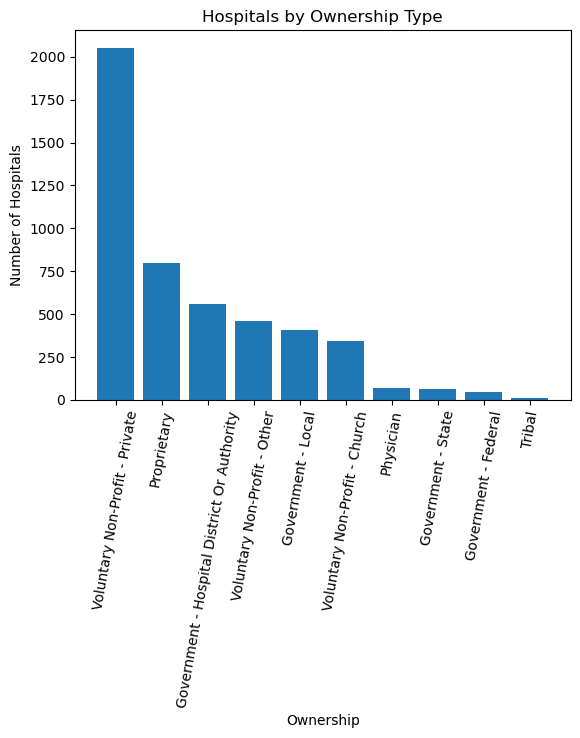

In [11]:
ownership_count = df['Hospital Ownership'].value_counts()

plt.figure()
plt.bar(ownership_count.index, ownership_count.values)
plt.title("Hospitals by Ownership Type")
plt.xlabel("Ownership")
plt.ylabel("Number of Hospitals")
plt.xticks(rotation=80)
plt.show()


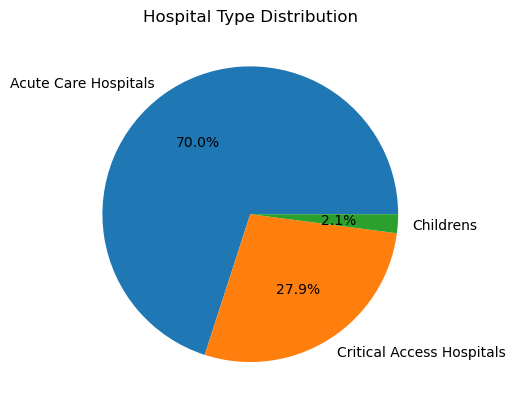

In [12]:
type_dist = df['Hospital Type'].value_counts()

plt.figure()
plt.pie(type_dist, labels=type_dist.index, autopct='%1.1f%%')
plt.title("Hospital Type Distribution")
plt.show()


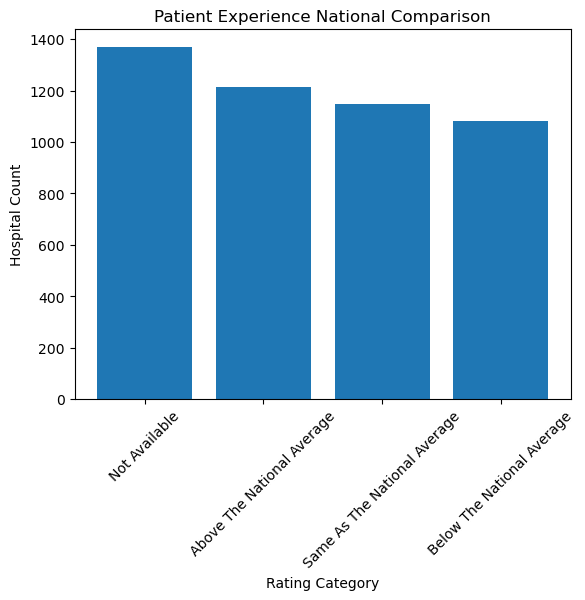

In [13]:
patient_exp = df['Patient experience national comparison'].value_counts()

plt.figure()
plt.bar(patient_exp.index, patient_exp.values)
plt.title("Patient Experience National Comparison")
plt.xlabel("Rating Category")
plt.ylabel("Hospital Count")
plt.xticks(rotation=45)
plt.show()


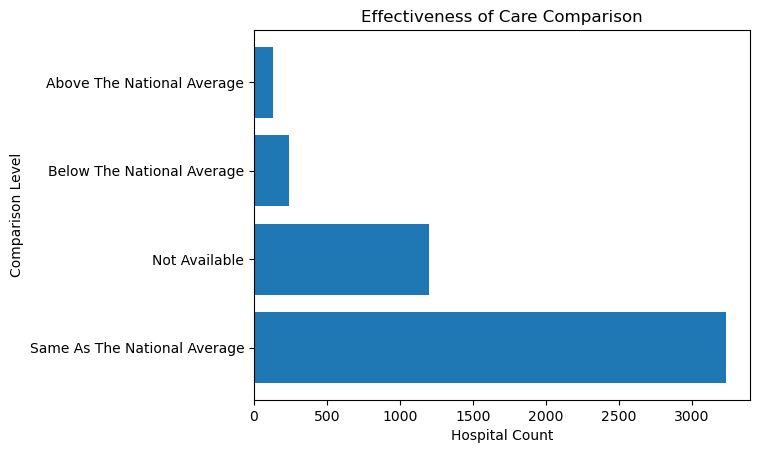

In [14]:
care_effect = df['Effectiveness of care national comparison'].value_counts()

plt.figure()
plt.barh(care_effect.index, care_effect.values)
plt.title("Effectiveness of Care Comparison")
plt.xlabel("Hospital Count")
plt.ylabel("Comparison Level")
plt.show()


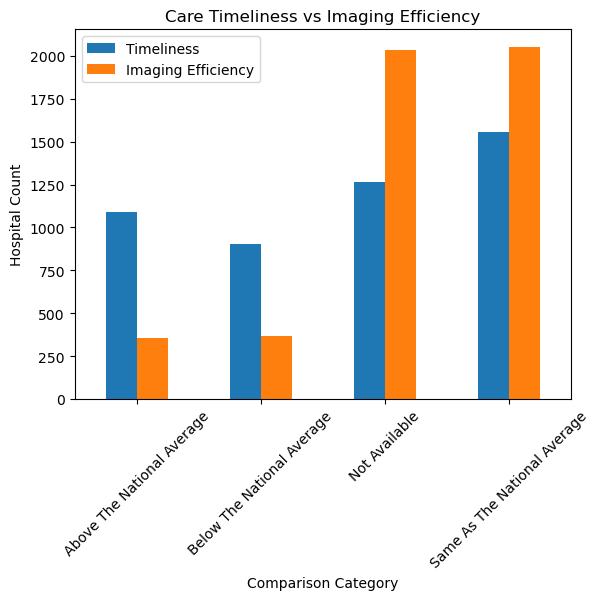

In [15]:
timeliness = df['Timeliness of care national comparison'].value_counts()
imaging = df['Efficient use of medical imaging national comparison'].value_counts()

combined = pd.DataFrame({
    'Timeliness': timeliness,
    'Imaging Efficiency': imaging
}).fillna(0)

combined.plot(kind='bar')
plt.title("Care Timeliness vs Imaging Efficiency")
plt.xlabel("Comparison Category")
plt.ylabel("Hospital Count")
plt.xticks(rotation=45)
plt.show()


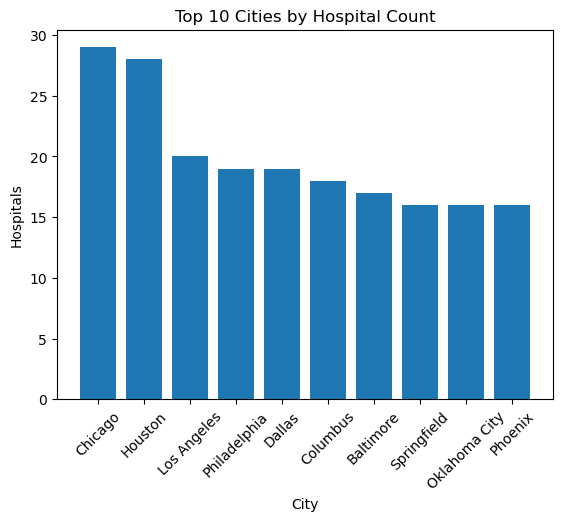

In [16]:
top_cities = df['City'].value_counts().head(10)

plt.figure()
plt.bar(top_cities.index, top_cities.values)
plt.title("Top 10 Cities by Hospital Count")
plt.xlabel("City")
plt.ylabel("Hospitals")
plt.xticks(rotation=45)
plt.show()


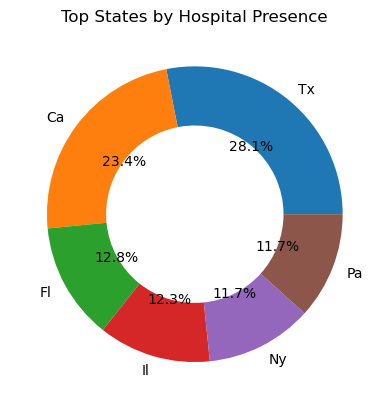

In [17]:
state_count = df['State'].value_counts().head(6)

plt.figure()
plt.pie(state_count, labels=state_count.index, autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title("Top States by Hospital Presence")
plt.show()


In [18]:
df.to_csv("Cleaned_Hospital_Quality_Data.csv", index=False)


NameError: name 'df' is not defined

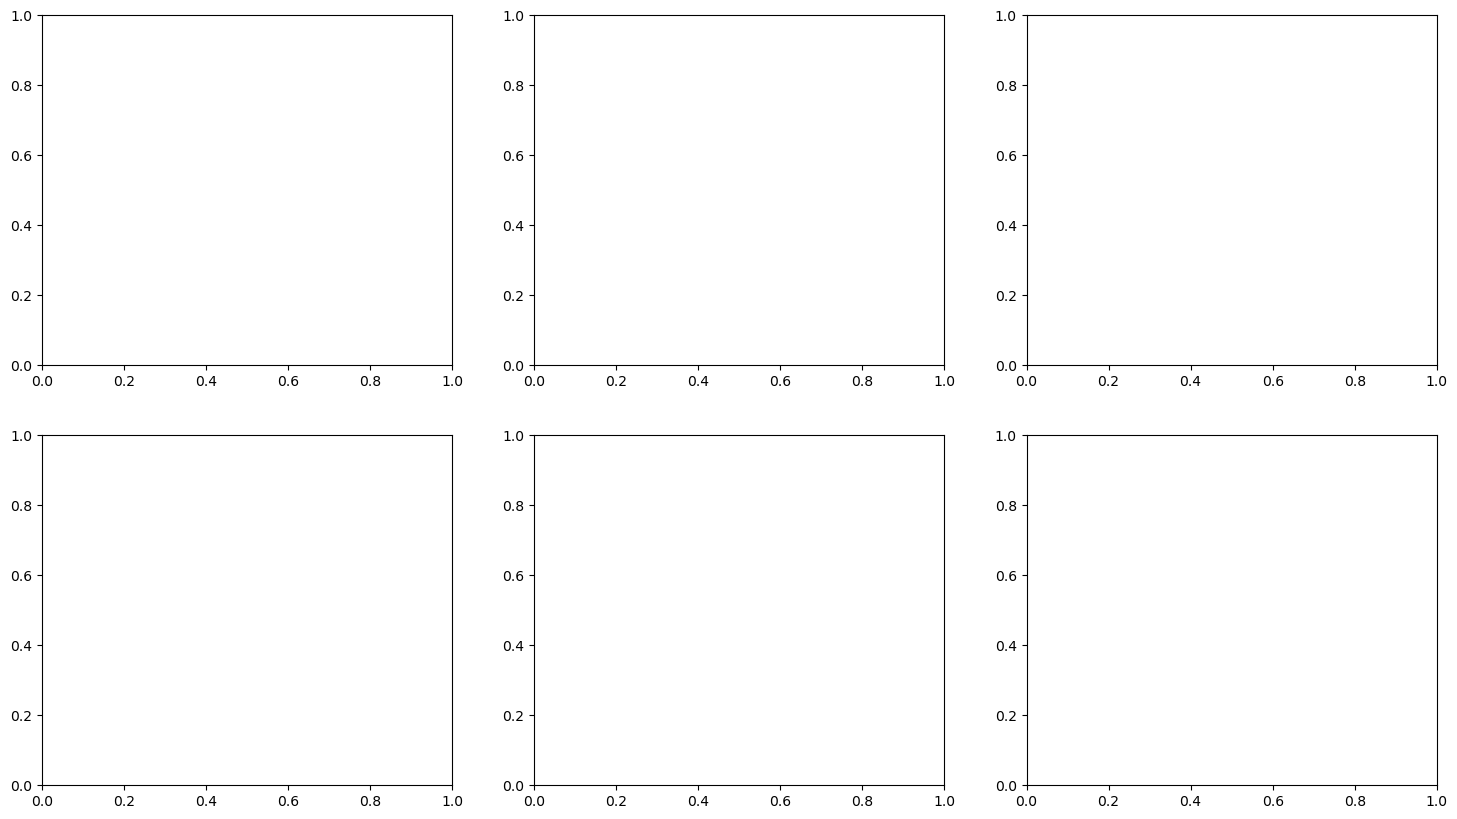

In [1]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1️⃣ Hospitals by Ownership
ownership_count = df['Hospital Ownership'].value_counts()
axes[0, 0].bar(ownership_count.index, ownership_count.values)
axes[0, 0].set_title("Hospitals by Ownership")
axes[0, 0].tick_params(axis='x', rotation=45)

# 2️⃣ Hospital Type Distribution (Pie)
type_dist = df['Hospital Type'].value_counts()
axes[0, 1].pie(type_dist, labels=type_dist.index, autopct='%1.1f%%')
axes[0, 1].set_title("Hospital Type Distribution")

# 3️⃣ Patient Experience
patient_exp = df['Patient experience national comparison'].value_counts()
axes[0, 2].bar(patient_exp.index, patient_exp.values)
axes[0, 2].set_title("Patient Experience")
axes[0, 2].tick_params(axis='x', rotation=45)

# 4️⃣ Effectiveness of Care
care_effect = df['Effectiveness of care national comparison'].value_counts()
axes[1, 0].barh(care_effect.index, care_effect.values)
axes[1, 0].set_title("Effectiveness of Care")

# 5️⃣ Timeliness of Care
timeliness = df['Timeliness of care national comparison'].value_counts()
axes[1, 1].bar(timeliness.index, timeliness.values)
axes[1, 1].set_title("Timeliness of Care")
axes[1, 1].tick_params(axis='x', rotation=45)

# 6️⃣ Top Cities by Hospital Count
top_cities = df['City'].value_counts().head(5)
axes[1, 2].bar(top_cities.index, top_cities.values)
axes[1, 2].set_title("Top Cities")
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
